<a href="https://colab.research.google.com/github/Swapn2/deep_learning/blob/main/graduate_admission_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/Admission_Predict.csv')

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(400, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [9]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.drop(columns = ['Serial No.'],inplace = True)

In [13]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [14]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [15]:
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
395,0.82
396,0.84
397,0.91
398,0.67


In [16]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = .2 , random_state = 1)

In [19]:
x_train.shape

(320, 7)

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [31]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [32]:
x_train_scaled

array([[0.22      , 0.17857143, 0.25      , ..., 0.42857143, 0.25      ,
        1.        ],
       [0.88      , 0.96428571, 1.        , ..., 0.85714286, 0.91911765,
        1.        ],
       [0.3       , 0.71428571, 0.5       , ..., 0.57142857, 0.53308824,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.70220588,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.74632353,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.22058824,
        0.        ]])

In [33]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [47]:
model = Sequential()
model.add(Dense(7 , activation = 'relu',input_dim = 7))
model.add(Dense(7 , activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
model.compile(loss='mean_squared_error', optimizer = 'Adam')

In [50]:
history = model.fit(x_train_scaled,y_train,epochs = 100, validation_split = .2)

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.4775 - val_loss: 0.4785
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4303 - val_loss: 0.4212
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3751 - val_loss: 0.3612
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2991 - val_loss: 0.2962
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2532 - val_loss: 0.2259
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1808 - val_loss: 0.1585
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1298 - val_loss: 0.1022
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0758 - val_loss: 0.0616
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0490 - val_loss: 0.0369
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0274 - val_loss: 0.0257
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0253 - val_loss: 0.0221
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0221 - val_lo

In [51]:
y_pred = model.predict(x_test_scaled)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


In [52]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.740870389035758

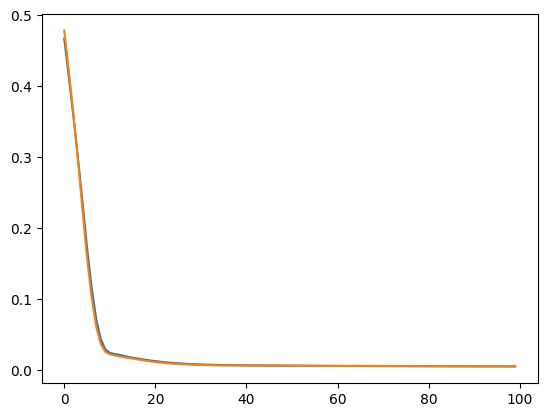

In [53]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])